Objective: A simple implementation of Linear Regression from scratch using Python and NumPy. This project demonstrates key concepts like gradient descent, cost function, and model evaluation without relying on machine learning libraries like scikit-learn. Ideal for learning fundamentals.


#**Linear Regression Model**

In [15]:
import numpy as np

In [27]:
# Creating in class template

class Linear_Regression():

    #initiating parameters (hyper parameters: learning_rate and no_of_iteration)
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations


    def fit(self, X, Y):
        # number of training example and number of features
        self.m, self.n = X.shape  # rows and columns of the dataset

        #initiating the weights and bias
        self.w = np.zeros(self.n)   # we can initialize it with 0 as well but often not every problem has only 1 independent colummn
        self.b = 0
        self.X = X
        self.Y = Y

        #Implementing gradient Descent algorithm
        for i in range(self.no_of_iterations):
            self.update_weights()


    def update_weights(self):
        Y_prediction = self.predict(self.X)

        # Calculate the variance
        dw = -(2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = -2 * np.sum(self.Y - Y_prediction)/self.m

        # Updating the weights
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db

    def predict(self, X):
        return X.dot(self.w) + self.b      #returns the line formula

# Using Linear Regression Model

### Implementing Demo Experience -> Salary Data

In [17]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [18]:
# Data Preprocessing
df = pd.read_csv("/content/salary_data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [19]:
# Last 5 rows of the dataset
df.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [20]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [21]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [22]:
X,Y

(array([[ 1.1],
        [ 1.3],
        [ 1.5],
        [ 2. ],
        [ 2.2],
        [ 2.9],
        [ 3. ],
        [ 3.2],
        [ 3.2],
        [ 3.7],
        [ 3.9],
        [ 4. ],
        [ 4. ],
        [ 4.1],
        [ 4.5],
        [ 4.9],
        [ 5.1],
        [ 5.3],
        [ 5.9],
        [ 6. ],
        [ 6.8],
        [ 7.1],
        [ 7.9],
        [ 8.2],
        [ 8.7],
        [ 9. ],
        [ 9.5],
        [ 9.6],
        [10.3],
        [10.5]]),
 array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
         64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
         66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
        109431, 105582, 116969, 112635, 122391, 121872]))

In [28]:
# Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((21, 1), (9, 1), (21,), (9,))

In [35]:
# Training the Model
model = Linear_Regression(learning_rate = 0.001, no_of_iterations=1000)
model

In [36]:
# Fitting the model
model.fit(x_train, y_train)

In [37]:
# print the parameter values (weights and bias)
print("Weight: ", model.w[0])
print("Bias: ", model.b)

Weight:  11688.173928448785
Bias:  11052.528823665803


y = mx + c

In [38]:
# predict the salary value for test data
y_pred = model.predict(x_test)
y_pred

array([123258.99853677,  68324.58107306, 106895.55503695,  72999.85064444,
        48454.6853947 ,  54298.77235893, 131440.72028669, 112739.64200117,
        57805.22453746])

Visualizing predicted and actual value

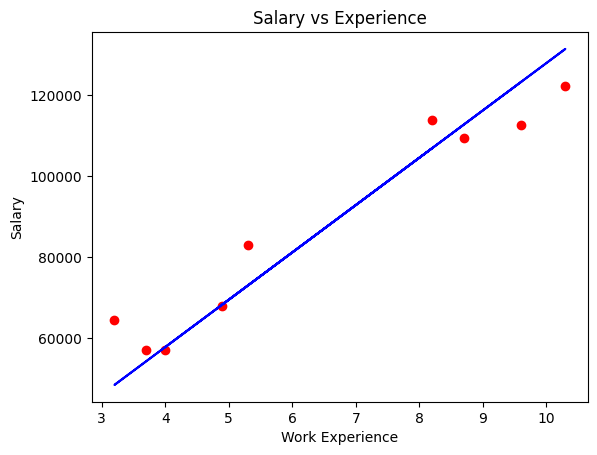

In [39]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, y_pred, color='blue')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()

Thank you for going through this till the end, feel free to get in touch if you have any questions... :)